# Unpacking Spotify: Clustering and Recommending Songs by Audio Traits

## Project Introduction

**Dataset Information:** https://www.kaggle.com/datasets/imuhammad/audio-features-and-lyrics-of-spotify-songs/data

This dataset, found on Kaggle, contains information about a variety of songs gathered from Spotify, including their audio features like danceability, energy, tempo, and their song lyrics. It also contains some information regarding the artists, albums the songs are a part of and some playlists that the songs are found on.

**Project Objective:** Moving beyond traditional genre labels, this project seeks to identify song similarities through clustering based on their audio features. By analyzing these distinct elements, and their combination, we aim to reveal nuanced relationships between songs that can provide a richer perspective on musical taste.

## Dependencies and Data Imports

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Spotify dataset
df = pd.read_csv('data/spotify_songs.csv')

print("Dataset loaded successfully!")
print(f"Shape of the dataset: {df.shape}")
print(f"Columns: {(df.columns)}")

Dataset loaded successfully!
Shape of the dataset: (18454, 25)
Columns: Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')


## Dataset Overview

In [3]:
df.head()

track_id                                         track_name  \
0  0017A6SJgTbfQVU2EtsPNo                                           Pangarap   
1  004s3t0ONYlzxII9PLgU6z                                       I Feel Alive   
2  00chLpzhgVjxs1zKC9UScL                                             Poison   
3  00cqd6ZsSkLZqGMlQCR0Zo  Baby It's Cold Outside (feat. Christina Aguilera)   
4  00emjlCv9azBN0fzuuyLqy                                         Dumb Litty   

      track_artist                                             lyrics  \
0  Barbie's Cradle  Minsan pa Nang ako'y napalingon Hindi ko alam ...   
1    Steady Rollin  The trees, are singing in the wind The sky blu...   
2   Bell Biv DeVoe  NA Yeah, Spyderman and Freeze in full effect U...   
3      CeeLo Green  I really can't stay Baby it's cold outside I'v...   
4             KARD  Get up out of my business You don't keep me fr...   

   track_popularity          track_album_id  \
0                41  1srJQ0njEQgd8w4XSqI4JQ   
1                28  3z04Lb9Dsilqw68SHt6jLB   
2                 0  6oZ6brjB8x3GoeSYdwJdPc   
3                41  3ssspRe42CXkhPxdc12xcp   
4                65  7h5X3xhh3peIK9Y0qI5hbK   

                       track_album_name track_album_release_date  \
0                                  Trip               2001-01-01   
1                           Love & Loss               2017-11-21   
2                                  Gold               2005-01-01   
3                  CeeLo's Magic Moment               2012-10-29   
4  KARD 2nd Digital Single ‘Dumb Litty’               2019-09-22   

                                       playlist_name             playlist_id  \
0                                 Pinoy Classic Rock  37i9dQZF1DWYDQ8wBxd7xt   
1                                  Hard Rock Workout  3YouF0u7waJnolytf9JCXf   
2  Back in the day - R&B, New Jack Swing, Swingbe...  3a9y4eeCJRmG9p4YKfqYIx   
3                                     Christmas Soul  6FZYc2BvF7tColxO8PBShV   
4                                  K-Party Dance Mix  37i9dQZF1DX4RDXswvP6Mj   

   ... loudness mode  speechiness  acousticness  instrumentalness  liveness  \
0  ...  -10.068    1       0.0236       0.27900           0.01170    0.0887   
1  ...   -4.739    1       0.0442       0.01170           0.00994    0.3470   
2  ...   -7.504    0       0.2160       0.00432           0.00723    0.4890   
3  ...   -5.819    0       0.0341       0.68900           0.00000    0.0664   
4  ...   -1.993    1       0.0409       0.03700           0.00000    0.1380   

   valence    tempo  duration_ms  language  
0    0.566   97.091       235440        tl  
1    0.404  135.225       373512        en  
2    0.650  111.904       262467        en  
3    0.405  118.593       243067        en  
4    0.240  130.018       193160        en  

[5 rows x 25 columns]

In [4]:
df.describe()

track_popularity  danceability        energy           key  \
count      18454.000000  18454.000000  18454.000000  18454.000000   
mean          42.438821      0.644066      0.692289      5.342094   
std           24.616740      0.150071      0.180635      3.613121   
min            0.000000      0.098500      0.016700      0.000000   
25%           24.000000      0.546000      0.573000      2.000000   
50%           48.000000      0.660000      0.715000      6.000000   
75%           62.000000      0.755000      0.835000      9.000000   
max          100.000000      0.979000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  18454.000000  18454.000000  18454.000000  18454.000000   
mean      -6.769159      0.580525      0.106192      0.175348   
std        2.920757      0.493487      0.102291      0.217795   
min      -34.283000      0.000000      0.022400      0.000001   
25%       -8.249000      0.000000      0.039700      0.016100   
50%       -6.227000      1.000000      0.060300      0.081900   
75%       -4.719000      1.000000      0.130000      0.254000   
max        1.275000      1.000000      0.918000      0.992000   

       instrumentalness      liveness       valence         tempo  \
count      18454.000000  18454.000000  18454.000000  18454.000000   
mean           0.051216      0.189593      0.520598    120.812167   
std            0.168263      0.153751      0.228716     27.586424   
min            0.000000      0.009360      0.000010     37.114000   
25%            0.000000      0.092700      0.345000     98.856000   
50%            0.000009      0.128000      0.522000    120.045000   
75%            0.001720      0.246000      0.700000    135.984000   
max            0.987000      0.996000      0.991000    214.047000   

         duration_ms  
count   18454.000000  
mean   230319.306763  
std     57255.086685  
min     31893.000000  
25%    193230.250000  
50%    221340.000000  
75%    258078.250000  
max    517810.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

- At first glance, there are a lot of columns and not all of them are necessary or could be added noise when building the model such as those surrounding album and playlist so those will be dropped. The playlist genre can be helpful in adding a layer of validation or cluster comparison/understanding after the model building so that one will be kept.

## Data Cleaning

In [6]:
df = df.drop(columns = ['track_popularity', 'track_album_id', 'track_album_name',
                        'playlist_name', 'playlist_id',
                        'track_id', 'lyrics'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                18454 non-null  object 
 1   track_artist              18454 non-null  object 
 2   track_album_release_date  18454 non-null  object 
 3   playlist_genre            18454 non-null  object 
 4   playlist_subgenre         18454 non-null  object 
 5   danceability              18454 non-null  float64
 6   energy                    18454 non-null  float64
 7   key                       18454 non-null  int64  
 8   loudness                  18454 non-null  float64
 9   mode                      18454 non-null  int64  
 10  speechiness               18454 non-null  float64
 11  acousticness              18454 non-null  float64
 12  instrumentalness          18454 non-null  float64
 13  liveness                  18454 non-null  float64
 14  valenc

In [8]:
# Keep only English songs
english_df = df[df['language'].str.lower() == 'en'].copy()

In [9]:
english_df.count()

track_name                  15405
track_artist                15405
track_album_release_date    15405
playlist_genre              15405
playlist_subgenre           15405
danceability                15405
energy                      15405
key                         15405
loudness                    15405
mode                        15405
speechiness                 15405
acousticness                15405
instrumentalness            15405
liveness                    15405
valence                     15405
tempo                       15405
duration_ms                 15405
language                    15405
dtype: int64

In [10]:
english_df = english_df.drop(columns = ['language'])

In [11]:
english_df.isnull().sum()

track_name                  0
track_artist                0
track_album_release_date    0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [12]:
# Check for duplicate rows in English_df
duplicates_english_df = english_df.duplicated().sum()
print(f"Number of duplicate rows in english_df: {duplicates_english_df}")

Number of duplicate rows in english_df: 63


In [13]:
# Removing duplicates from english_df
english_df = english_df.drop_duplicates()
print(f"\nShape of english_df after removing duplicates: {english_df.shape}")


Shape of english_df after removing duplicates: (15342, 17)


In [14]:
# Check for duplicates in track names
duplicate_track_names = english_df[['track_name']].duplicated().sum()
print(f"Number of duplicate track names: {duplicate_track_names}")

Number of duplicate track names: 2829


In [15]:
# Drop duplicated 'track_name' entries
english_df = english_df.drop_duplicates(subset=['track_name'])
print(f"Shape of english_df after dropping duplicate track names: {english_df.shape}")

Shape of english_df after dropping duplicate track names: (12513, 17)


In [16]:
# Check for null values once more
english_df.isnull().sum()

track_name                  0
track_artist                0
track_album_release_date    0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [17]:
english_df.head()

track_name    track_artist  \
1                                       I Feel Alive   Steady Rollin   
2                                             Poison  Bell Biv DeVoe   
3  Baby It's Cold Outside (feat. Christina Aguilera)     CeeLo Green   
4                                         Dumb Litty            KARD   
5                                            Soldier        James TW   

  track_album_release_date playlist_genre   playlist_subgenre  danceability  \
1               2017-11-21           rock           hard rock         0.303   
2               2005-01-01            r&b      new jack swing         0.845   
3               2012-10-29            r&b            neo soul         0.425   
4               2019-09-22            pop           dance pop         0.760   
5               2019-04-26            r&b  urban contemporary         0.496   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
1   0.880    9    -4.739     1       0.0442       0.01170           0.00994   
2   0.652    6    -7.504     0       0.2160       0.00432           0.00723   
3   0.378    5    -5.819     0       0.0341       0.68900           0.00000   
4   0.887    9    -1.993     1       0.0409       0.03700           0.00000   
5   0.639    6    -6.157     1       0.0550       0.28000           0.00000   

   liveness  valence    tempo  duration_ms  
1    0.3470    0.404  135.225       373512  
2    0.4890    0.650  111.904       262467  
3    0.0664    0.405  118.593       243067  
4    0.1380    0.240  130.018       193160  
5    0.0975    0.305  147.764       224720

In [18]:
# Convert track_album_release_date to release year as this is more useful and simplistic for analysis
english_df['release_year'] = english_df['track_album_release_date'].str.split('-').str[0].astype(int)
print('Earliest music release: ', english_df['release_year'].min())
print('Latest music release: ', english_df['release_year'].max())

Earliest music release:  1957
Latest music release:  2020


In [19]:
english_df = english_df.drop(columns=['track_album_release_date'])

## Date Exploration and EDA

In [20]:
genre_year_count = english_df.groupby(['release_year', 'playlist_genre']).size().reset_index(name='count')
print(genre_year_count)

     release_year playlist_genre  count
0            1957            r&b      1
1            1957           rock      1
2            1958           rock      1
3            1960            r&b      1
4            1963           rock      3
..            ...            ...    ...
269          2020          latin      8
270          2020            pop     81
271          2020            r&b     15
272          2020            rap     31
273          2020           rock     19

[274 rows x 3 columns]


In [21]:
# Plot the genre year count in a line graph
fig = px.line(genre_year_count, x='release_year', y='count', color='playlist_genre', title='Genre Year Count Line Graph')
fig.show()

- From the chart above, there is very little representation from any one genre or even total counts prior to 2010. The majority of the data comes from after 2010. The apparent genre spikes are clear, with rock music being prevalant between 1970 and 1990 and then an increasing amount of pop music starting in 2000 and spiking befor 2020. 

In [22]:
english_df['playlist_genre'].value_counts()

playlist_genre
pop      2957
rock     2674
r&b      2537
rap      2156
edm      1479
latin     710
Name: count, dtype: int64

In [23]:
english_df['playlist_subgenre'].value_counts()

playlist_subgenre
indie poptimism              1028
southern hip hop              993
neo soul                      830
urban contemporary            760
hard rock                     705
permanent wave                689
post-teen pop                 667
classic rock                  646
dance pop                     636
album rock                    634
electropop                    626
new jack swing                618
gangster rap                  572
progressive electro house     477
pop edm                       432
hip hop                       418
electro house                 342
hip pop                       329
latin hip hop                 294
tropical                      242
big room                      228
trap                          173
latin pop                     165
reggaeton                       9
Name: count, dtype: int64

- The subgrenres could offer a significantly more diverse variety of groups that can be more indicative of their similarity.

In [24]:
english_df.dtypes

track_name            object
track_artist          object
playlist_genre        object
playlist_subgenre     object
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms            int64
release_year           int64
dtype: object

In [25]:
# Convert key, mode, and release_year to categorical variables
english_df['key'] = english_df['key'].astype('category')
english_df['mode'] = english_df['mode'].astype('category')
english_df['release_year'] = english_df['release_year'].astype('category')
english_df['playlist_genre'] = english_df['playlist_genre'].astype('category')
english_df['playlist_subgenre'] = english_df['playlist_subgenre'].astype('category')

# Verify the changes
print(english_df.dtypes)

track_name             object
track_artist           object
playlist_genre       category
playlist_subgenre    category
danceability          float64
energy                float64
key                  category
loudness              float64
mode                 category
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_ms             int64
release_year         category
dtype: object


In [26]:
# Separate categorical and numerical variables for ease of exploration

categorical_vars = english_df.select_dtypes(include=['category']).columns.tolist()
numerical_vars = english_df.select_dtypes(exclude=['category', 'object']).columns.tolist()

## Audio Feature Descriptions

- danceability: How suitable for dancing (0=not danceable, 1=very danceable)
- energy: How energetic/intense (0=calm, 1=high energy)
- loudness: How loud in decibels (negative numbers, closer to 0 = louder)
- speechiness: How much spoken word (0=music only, 1=mostly speech)
- acousticness: How acoustic vs electronic (0=electronic, 1=acoustic)
- instrumentalness: How much vocals (0=lots of vocals, 1=instrumental)
- liveness: Sounds like live performance (0=studio, 1=live)
- valence: Musical mood (0=sad/angry, 1=happy/positive)
- tempo: Speed in beats per minute (BPM)
- duration_ms: Song length in milliseconds

In [28]:
for var in categorical_vars:
    fig = px.histogram(english_df, x=var, title=f'Distribution of {var}', color_discrete_sequence=['#636EFA'])
    fig.show()

## Categorical Distribution Analysis

The dataset contains several categorical variables that provide insights into the characteristics of songs. These variables include:

- **Playlist Genre**: Represents the broader genre classification of songs, such as rock, pop, or rap.
- **Playlist Subgenre**: Offers a more granular view of song classification, such as classic rock, dance pop, or southern hip hop.
- **Key**: Indicates the musical key in which the song is composed.
- **Mode**: Represents the modality of the song (major or minor).
- **Release Year**: Captures the year the song was released.

### Observations:
1. **Playlist Genre**:
    - The distribution of genres shows a dominance of certain genres like rock and pop, with others having smaller representation.
    - This variable is useful for understanding the broader musical trends.

2. **Playlist Subgenre**:
    - Subgenres provide a richer diversity, offering more specific groupings that can be indicative of song similarity.
    - The subgenre distribution highlights the variety within broader genres.

3. **Key and Mode**:
    - These musical attributes are categorical but can influence the mood and style of the song.

4. **Release Year**:
    - The release year distribution shows a concentration of songs from recent decades, with fewer songs from earlier years prior to 2010 and significantly less in the 1900s.

### Visualizations:
Histograms and bar charts can be used to visualize the distribution of these categorical variables, providing insights into their frequency and diversity across the dataset.


In [29]:
fig = px.box(english_df, x='playlist_genre', y='duration_ms', title='Box Plot of Duration by Genre', color='playlist_genre')
fig.show()


## Box Plot Analysis of Song Duration by Genre

Box plots provide a visual summary of the distribution of song durations across different genres. They highlight the range, median, and potential outliers within each genre. 

### Observations:
1. **Genre Variability**:
    - Genres like rock and pop exhibit a wide range of song durations, indicating diversity in song structure and composition.
    - Some genres, such as rap, tend to have shorter durations compared to others.

2. **Outliers**:
    - Outliers are present in several genres, showcasing songs that deviate significantly from the typical duration within their genre.

3. **Median Duration**:
    - The median duration varies across genres, reflecting differences in typical song lengths.

### Insights:
Understanding the distribution of song durations by genre can help identify patterns and trends in music production. For example, genres with longer durations may cater to audiences seeking immersive experiences, while shorter durations might align with fast-paced, high-energy genres.


In [30]:
for var in numerical_vars:
    fig = px.histogram(english_df, x=var, title=f'Distribution of {var}', color_discrete_sequence=['#636EFA'])
    fig.show()

## Numerical Distributions Analysis

The dataset contains several numerical variables that represent audio features of songs. These variables provide insights into the characteristics of songs and their variability across the dataset.

### Observations:
1. **Danceability**:
    - The distribution shows a concentration of tracks with moderate danceability, indicating a balance between danceable and non-danceable tracks.

2. **Energy**:
    - Tracks exhibit a wide range of energy levels, with a slight skew towards higher energy values, suggesting a preference for energetic music.

3. **Loudness**:
    - Most tracks fall within a typical loudness range, with few outliers indicating exceptionally loud or quiet tracks.

4. **Speechiness**:
    - The majority of tracks have low speechiness, indicating that most tracks are primarily musical rather than spoken.

5. **Acousticness**:
    - The distribution highlights a mix of acoustic and electronic tracks, with a slight skew towards electronic music.

6. **Instrumentalness**:
    - Most tracks have low instrumentalness, suggesting a prevalence of vocal tracks in the dataset.

7. **Liveness**:
    - Tracks generally have low liveness, indicating that most are studio recordings rather than live performances.

8. **Valence**:
    - The valence distribution shows a balance between positive and negative moods, reflecting diversity in musical emotions.

9. **Tempo**:
    - The tempo distribution is centered around typical BPM values, with some tracks exhibiting very fast or slow tempos.

10. **Duration**:
     - Track durations vary widely, with most tracks falling within a standard range for popular music.

### Insights:
Understanding the distributions of these numerical variables helps in identifying patterns and trends in the dataset. For example:
- High energy and danceability values may indicate tracks suitable for parties or workouts.
- Acousticness and instrumentalness can help differentiate between genres like electronic and classical music.
- Valence and tempo provide insights into the mood and pace of tracks, which can be useful for playlist curation and recommendation systems.

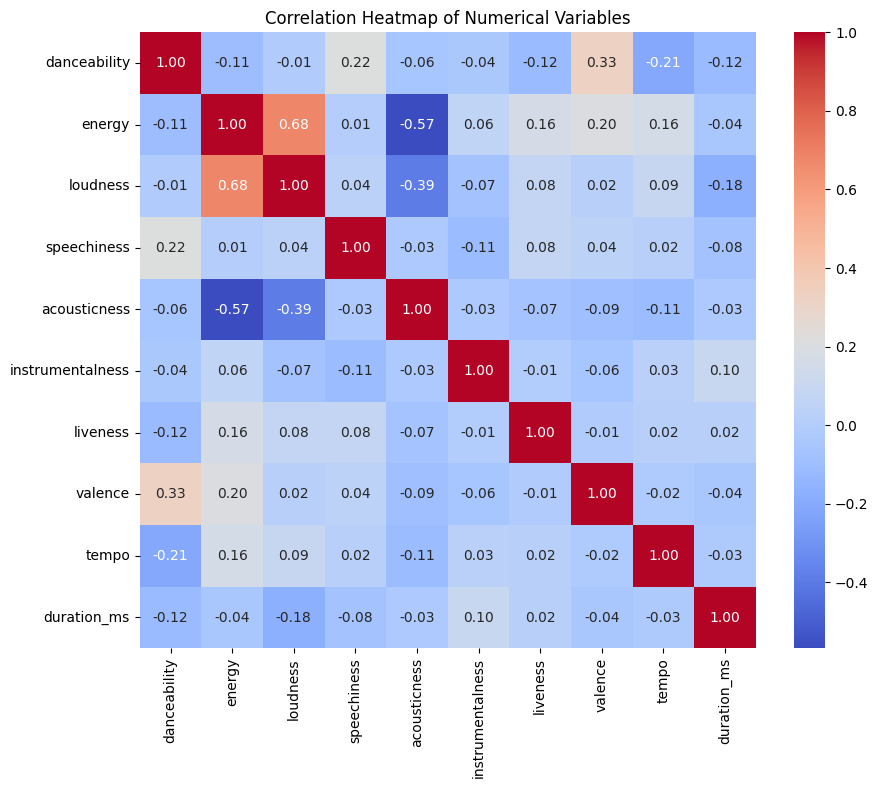

In [31]:
# Compute the correlation matrix for numerical variables
correlation_matrix = english_df[numerical_vars].corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Correlation Heatmap Analysis

The correlation heatmap provides insights into the relationships between numerical audio features in the dataset. Key observations include:

### Strong Positive Correlations:
1. **Energy and Loudness**:
    - A strong positive correlation indicates that higher energy tracks tend to be louder.
    - This relationship aligns with the characteristics of energetic music, which often features amplified sound levels.

2. **Danceability and Valence**:
    - Tracks with higher danceability often exhibit positive valence, suggesting that danceable songs are generally perceived as happier or more uplifting.

### Strong Negative Correlations:
1. **Energy and Acousticness**:
    - Tracks with higher energy levels tend to have lower acousticness, indicating a preference for electronic or amplified sounds in energetic music.

2. **Loudness and Acousticness**:
    - Louder tracks are less likely to be acoustic, reinforcing the distinction between electronic and acoustic music styles.

### Weak or No Correlations:
1. **Instrumentalness**:
    - Instrumentalness shows weak correlations with most features, suggesting that the presence of vocals does not strongly influence other audio traits.

2. **Speechiness**:
    - Speechiness has minimal correlation with other features, indicating that spoken word content is relatively independent of musical characteristics like energy or danceability.

### Insights:
- The correlations highlight distinct patterns in audio features that can be leveraged for clustering and classification tasks.
- Features like energy, loudness, and acousticness play a significant role in differentiating music styles, while others like instrumentalness and speechiness provide unique but less interconnected information.

Understanding these relationships helps in selecting features for modeling and interpreting the underlying structure of the dataset.

## Initial K Means Clustering

In [32]:
# Select only the audio feature columns
audio_features = [
    'danceability', 'energy', 'loudness',
    'acousticness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

print(f"Using {len(audio_features)} audio features for clustering")

# Get the audio data
audio_data = english_df[audio_features].copy()

# Check for any missing values
print(f" Audio data shape: {audio_data.shape}")
print(f" Missing values: {audio_data.isnull().sum().sum()}")

Using 8 audio features for clustering
 Audio data shape: (12513, 8)
 Missing values: 0


In [33]:
# Scale the features so they're all on similar ranges
scaler = StandardScaler()
audio_scaled = scaler.fit_transform(audio_data)

In [34]:
def find_best_audio_clusters(data, max_k=12):
    """Find the best number of clusters for audio features"""

    scores = []
    inertias = []
    k_range = range(2, max_k + 1)

    print(" Testing different numbers of audio clusters...")

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)

        # Calculate silhouette score
        score = silhouette_score(data, labels)
        scores.append(score)
        inertias.append(kmeans.inertia_)

        print(f"   {k} clusters: silhouette score = {score:.3f}")

    best_k = k_range[np.argmax(scores)]
    print(f"Best number of clusters: {best_k} (score: {max(scores):.3f})")

    return best_k, k_range, scores, inertias

In [35]:
# Find optimal clusters
best_k, k_range, scores, inertias = find_best_audio_clusters(audio_scaled)

# Plot the results using Plotly
fig = px.line(x=k_range, y=scores, title='Silhouette Scores for Audio Feature Clustering', labels={'x': 'Number of Clusters', 'y': 'Silhouette Score'})
fig.add_scatter(x=[best_k], y=[max(scores)], mode='markers', marker=dict(color='red', size=10), name=f'Best k={best_k}')
fig.show()

fig = px.line(x=k_range, y=inertias, title='Elbow Method for Audio Feature Clustering', labels={'x': 'Number of Clusters', 'y': 'Inertia'})
fig.add_scatter(x=[best_k], y=[min(inertias)], mode='markers', marker=dict(color='red', size=10), name=f'Best k={best_k}')
fig.show()


 Testing different numbers of audio clusters...
   2 clusters: silhouette score = 0.204
   3 clusters: silhouette score = 0.150
   4 clusters: silhouette score = 0.149
   5 clusters: silhouette score = 0.141
   6 clusters: silhouette score = 0.138
   7 clusters: silhouette score = 0.135
   8 clusters: silhouette score = 0.133
   9 clusters: silhouette score = 0.133
   10 clusters: silhouette score = 0.132
   11 clusters: silhouette score = 0.128
   12 clusters: silhouette score = 0.124
Best number of clusters: 2 (score: 0.204)


## Analysis of Silhouette Scores and Elbow Method Charts

### Silhouette Scores:
- **Peak Score**: Highest at `k=2`, indicating the msot well-defined clusters.
- **Trend**: Scores decrease as `k` increases, showing diminishing cluster quality.

### Elbow Method:
- **Elbow Point**: Clear elbow at `k=2`, where inertia reduction slows significantly.

### Conclusion:
Both methods identify `k=2` as optimal for audio feature clustering, balancing simplicity and quality.


In [36]:
print(f"Creating {best_k} audio-based clusters...")

# Perform clustering
kmeans_audio = KMeans(n_clusters=best_k, random_state=42, n_init=10)
audio_clusters = kmeans_audio.fit_predict(audio_scaled)

# Add to dataframe
english_df['audio_group'] = audio_clusters

# Show distribution
print("Songs per audio group:")
for group in sorted(set(audio_clusters)):
    count = sum(audio_clusters == group)
    percentage = (count / len(english_df)) * 100
    print(f"   Group {group}: {count} songs ({percentage:.1f}%)")

Creating 2 audio-based clusters...
Songs per audio group:
   Group 0: 3901 songs (31.2%)
   Group 1: 8612 songs (68.8%)


In [37]:
# Reduce dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)
audio_pca = pca.fit_transform(audio_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(audio_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = audio_clusters

# Scatterplot of the clusters
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Cluster', title='Audio Feature Clusters Visualization')
fig.show()

## PCA Visualization Analysis of Audio Feature Clusters

### Overview:
The PCA chart provides a 2-dimensional representation of the audio feature clusters, reducing the complexity of the dataset while preserving the variance. Each point represents a song, and the clusters are color-coded to highlight groupings based on audio traits.

### Observations:
1. **Cluster Separation**:
    - The clusters are well-separated, indicating distinct groupings based on audio features.
    - Some overlap exists between clusters, suggesting similarities in certain audio traits.

2. **Cluster Characteristics**:
    - Clusters closer to the origin may represent songs with balanced audio traits.
    - Outlying clusters could indicate songs with extreme values in specific features, such as high energy or acousticness.

3. **Genre Overlay**:
    - When overlaying playlist genres, certain genres dominate specific clusters, reinforcing the relationship between audio traits and genre classification.
    - Genres like rock and pop may span multiple clusters due to their diversity in audio characteristics.

### Insights:
- The PCA visualization highlights the clustering based on audio features, revealing some patterns and relationships in the dataset, however there is still a lot of variability between songs.

In [38]:
# Scatterplot of the PCA clusters with playlist genre as color overlay
pca_df['Playlist Genre'] = english_df['playlist_subgenre']

fig = px.scatter(
    pca_df, 
    x='PC1', 
    y='PC2', 
    color='Playlist Genre', 
    title='Audio Feature Clusters Visualization with Playlist Genre Overlay'
)

# Add a dotted line to separate the two clusters (example: vertical line at PC1 = 0)
fig.add_shape(
    type="line",
    x0=0, x1=0,
    y0=pca_df['PC2'].min(), y1=pca_df['PC2'].max(),
    line=dict(color="black", width=2, dash="dot")
)

fig.show()

## Overlay of Subgenre

- The inclusion of subgenre analysis aimed to explore whether specific subgenres exhibit closer groupings, potentially revealing stronger relationships within genres. However, the findings indicate that subgenres display a wide range of variability, even within the same genre. This observation highlights an important challenge: without a higher level of genre distinction, a recommender system based solely on audio traits may struggle to provide convincing recommendations. The lack of distinct audio trait patterns within genres suggests that audio features alone may not fully capture the nuances of musical preferences, emphasizing the need for additional contextual or metadata-based inputs to enhance recommendation accuracy.

## Feature Importance For Potential Reduction of Noise and Increased Performance

In [54]:
# Prepare the data
X = english_df[audio_features]
y = english_df['playlist_subgenre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': audio_features,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

# Plot feature importances using Plotly
fig = px.bar(
    feature_importances,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Feature Importance in Determining Playlist Genre',
    labels={'Importance': 'Importance', 'Feature': 'Audio Feature'},
    color='Importance',
    color_continuous_scale='viridis'
)
fig.update_layout(xaxis_title='Importance', yaxis_title='Audio Feature')
fig.show()

                           precision    recall  f1-score   support

               album rock       0.24      0.20      0.22       190
                 big room       0.20      0.14      0.16        58
             classic rock       0.22      0.27      0.24       186
                dance pop       0.23      0.26      0.24       199
            electro house       0.24      0.16      0.19       110
               electropop       0.08      0.04      0.05       199
             gangster rap       0.31      0.27      0.29       175
                hard rock       0.40      0.56      0.47       220
                  hip hop       0.24      0.18      0.21       129
                  hip pop       0.04      0.01      0.02        98
          indie poptimism       0.20      0.37      0.26       291
            latin hip hop       0.29      0.10      0.14        84
                latin pop       0.17      0.02      0.03        64
                 neo soul       0.24      0.33      0.28     

## Feature Reduction Analysis

### Objective:
Feature reduction was performed to identify the most impactful audio traits for clustering and classification tasks. By focusing on the top 5 features based on importance, we aim to reduce noise and improve model performance. The target variable, playlist subgenre, was chosen to base the feature importance off of because even though there is variety within genres as we've seen, genre tends to be a divider of music taste and similarity and that was the easiest way to potentially increase the performance of the clustering.

### Key Insights:
1. **Top Features**:
    - The top 5 features selected were `tempo`, `danceability`, `duration_ms`, `acousticness`, and `energy`.
    - These features exhibited the highest importance in determining playlist subgenres, as identified by the Random Forest Classifier.

In [40]:
# Select the top 5 features based on importance
top_features = feature_importances.head(5)['Feature'].tolist()

# Filter the data to include only the top 5 features
top_features_data = english_df[top_features].copy()

# Scale the features
top_features_scaled = scaler.fit_transform(top_features_data)

# Find the optimal number of clusters for the top 5 features
best_k_top, k_range_top, scores_top, inertias_top = find_best_audio_clusters(top_features_scaled)

# Plot the results using Plotly
fig = px.line(x=k_range_top, y=scores_top, title='Silhouette Scores for Top 5 Features Clustering', labels={'x': 'Number of Clusters', 'y': 'Silhouette Score'})
fig.add_scatter(x=[best_k_top], y=[max(scores_top)], mode='markers', marker=dict(color='red', size=10), name=f'Best k={best_k_top}')
fig.show()

fig = px.line(x=k_range_top, y=inertias_top, title='Elbow Method for Top 5 Features Clustering', labels={'x': 'Number of Clusters', 'y': 'Inertia'})
fig.add_scatter(x=[best_k_top], y=[min(inertias_top)], mode='markers', marker=dict(color='red', size=10), name=f'Best k={best_k_top}')
fig.show()

print(f"Best number of clusters for top 5 features: {best_k_top}")

 Testing different numbers of audio clusters...
   2 clusters: silhouette score = 0.275
   3 clusters: silhouette score = 0.205
   4 clusters: silhouette score = 0.203
   5 clusters: silhouette score = 0.184
   6 clusters: silhouette score = 0.176
   7 clusters: silhouette score = 0.182
   8 clusters: silhouette score = 0.177
   9 clusters: silhouette score = 0.172
   10 clusters: silhouette score = 0.168
   11 clusters: silhouette score = 0.157
   12 clusters: silhouette score = 0.159
Best number of clusters: 2 (score: 0.275)


Best number of clusters for top 5 features: 2


In [41]:
# Perform clustering with the new best k for top features
kmeans_top_features = KMeans(n_clusters=best_k_top, random_state=42, n_init=10)
top_features_clusters = kmeans_top_features.fit_predict(top_features_scaled)

# Reduce dimensions to 2 using PCA for visualization
pca_top_features = PCA(n_components=2)
top_features_pca = pca_top_features.fit_transform(top_features_scaled)

# Create a DataFrame for visualization
pca_top_features_df = pd.DataFrame(top_features_pca, columns=['PC1', 'PC2'])
pca_top_features_df['Cluster'] = top_features_clusters

# Scatterplot of the new clusters
fig = px.scatter(
    pca_top_features_df, 
    x='PC1', 
    y='PC2', 
    color='Cluster', 
    title=f'PCA Visualization of Top Features Clusters (k={best_k_top})'
)
fig.show()

**Clustering Results**:
    - Using only the top features, the optimal number of clusters (`k=2`) was determined through silhouette scores and the elbow method.
    - Despite the remaining cluster count being 2, the silhouette score improved and it seems to be more balanced than the previous initial clustering.
    - The reduced feature set maintained meaningful cluster separation, highlighting the slight effectiveness of feature selection.


Feature reduction successfully identified key audio traits that drive clustering and classification, enabling more focused analysis while minimizing redundancy in the dataset.

## Additional Variable Clustering

In [45]:
# One-hot encode the playlist genre
genre_encoder = OneHotEncoder(sparse_output=False)
genre_encoded = genre_encoder.fit_transform(english_df[['playlist_genre']])

# Combine top 5 audio features and encoded genre
audio_with_genre_top_features = np.hstack((top_features_scaled, genre_encoded * 3))  # Multiply genre encoding by 3 to increase its weight

# Find the optimal number of clusters
best_k_genre_top, k_range_genre_top, scores_genre_top, inertias_genre_top = find_best_audio_clusters(audio_with_genre_top_features)

# Perform clustering with the new best k
kmeans_genre_top = KMeans(n_clusters=best_k_genre_top, random_state=42, n_init=10)
genre_clusters_top = kmeans_genre_top.fit_predict(audio_with_genre_top_features)

# Add the cluster labels to the dataframe
english_df['genre_audio_group'] = genre_clusters_top

# Reduce dimensions to 2 using PCA for visualization
pca_genre_top = PCA(n_components=2)
genre_pca_top = pca_genre_top.fit_transform(audio_with_genre_top_features)

# Create a DataFrame for visualization
pca_genre_top_df = pd.DataFrame(genre_pca_top, columns=['PC1', 'PC2'])
pca_genre_top_df['Cluster'] = genre_clusters_top

# Scatterplot of the clusters
fig = px.scatter(
    pca_genre_top_df, 
    x='PC1', 
    y='PC2', 
    color='Cluster', 
    title=f'PCA Visualization of Clusters with Weighted Genre and Top Features (k={best_k_genre_top})'
)
fig.show()

 Testing different numbers of audio clusters...
   2 clusters: silhouette score = 0.202
   3 clusters: silhouette score = 0.276
   4 clusters: silhouette score = 0.357
   5 clusters: silhouette score = 0.419
   6 clusters: silhouette score = 0.455
   7 clusters: silhouette score = 0.442
   8 clusters: silhouette score = 0.397
   9 clusters: silhouette score = 0.368
   10 clusters: silhouette score = 0.333
   11 clusters: silhouette score = 0.325
   12 clusters: silhouette score = 0.311
Best number of clusters: 6 (score: 0.455)


## PCA Analysis with Weighted Genre

### Overview:
The PCA visualization incorporating weighted genre data alongside top audio features provides a more nuanced clustering of songs. By amplifying the influence of genre through weighting, the clusters reflect both audio traits and genre-specific characteristics.

### Observations:
1. **Improved Separation**:
    - Clusters exhibit clearer boundaries compared to audio-only clustering, indicating the added value of genre information in distinguishing song groups which is usually a very signicant influence on listeners' preferances in the case of a recommender system.

2. **Overlap Reduction**:
    - Weighted genre data reduces overlap between clusters, enhancing the distinctiveness of song groupings.

### Insights:
Incorporating weighted genre data improves clustering accuracy and provides a richer representation of song similarities, making it a valuable addition for recommendation systems and music analysis.

In [46]:
def recommend_similar_songs(song_name, num_recommendations=5):
    """
    Recommend similar songs based on top 5 audio features and weighted genre clustering.

    Parameters:
    song_name (str): Name of the song to find recommendations for.
    num_recommendations (int): Number of similar songs to recommend.

    Returns:
    pd.DataFrame: DataFrame containing recommended songs.
    """
    # Check if the song exists in the dataset
    if song_name not in english_df['track_name'].values:
        print(f"Song '{song_name}' not found in the dataset.")
        return None

    # Get the top features of the given song
    song_features = english_df.loc[english_df['track_name'] == song_name, top_features].values[0]

    # Get the cluster of the given song using weighted genre clustering
    song_cluster = english_df.loc[english_df['track_name'] == song_name, 'genre_audio_group'].values[0]

    # Filter songs in the same cluster
    cluster_songs = english_df[english_df['genre_audio_group'] == song_cluster]

    # Calculate the Euclidean distance between the given song and other songs in the cluster
    cluster_songs['distance'] = cluster_songs[top_features].apply(
        lambda row: np.linalg.norm(song_features - row.values), axis=1
    )

    # Sort by distance and exclude the given song
    recommendations = cluster_songs[cluster_songs['track_name'] != song_name].sort_values(by='distance')

    # Return the top recommendations
    return recommendations[['track_name', 'track_artist', 'playlist_genre', 'playlist_subgenre', 'distance']].head(num_recommendations)

# Example usage
song_to_recommend = "Love Bites"
recommended_songs = recommend_similar_songs(song_to_recommend, num_recommendations=5)

if recommended_songs is not None:
    print(f"Recommended songs similar to '{song_to_recommend}':")
    print(recommended_songs)

Recommended songs similar to 'Love Bites':
              track_name     track_artist playlist_genre playlist_subgenre  \
13225    Daffodil Lament  The Cranberries           rock        album rock   
10365       Highway Star      Deep Purple           rock      classic rock   
15312           Unbroken         Bon Jovi           rock      classic rock   
16057  I Was Only Joking      Rod Stewart           rock      classic rock   
1557      Come Sail Away             Styx           rock      classic rock   

          distance  
13225   102.697820  
10365   389.320127  
15312   682.764187  
16057   720.437674  
1557   1120.054593  


In [52]:
def highlight_recommendations_on_scatter(song_name, recommendations, pca_df):
    
    # Reset index of english_df to align with pca_df
    english_df_reset = english_df.reset_index(drop=True)

    # Extract the indices of the provided song and recommended songs
    song_index = english_df_reset[english_df_reset['track_name'] == song_name].index[0]
    recommendation_indices = english_df_reset[english_df_reset['track_name'].isin(recommendations['track_name'])].index

    # Add a column to indicate whether a song is highlighted
    pca_df['Highlight'] = 'Other Songs'
    pca_df.loc[song_index, 'Highlight'] = 'Provided Song'
    pca_df.loc[recommendation_indices, 'Highlight'] = 'Recommended Songs'

    # Create a scatterplot with highlights and include song names in the tooltip
    fig = px.scatter(
        pca_df,
        x='PC1',
        y='PC2',
        color='Highlight',
        title=f"PCA Visualization Highlighting '{song_name}' and Recommendations",
        hover_data={'track_name': english_df_reset['track_name']},  # Include song names in the tooltip
        color_discrete_map={
            'Provided Song': 'red',
            'Recommended Songs': 'blue',
            'Other Songs': 'gray'
        }
    )
    fig.show()

# Highlight the recommendations on the scatterplot using weighted genre and top features PCA
highlight_recommendations_on_scatter(song_to_recommend, recommended_songs, pca_genre_top_df)

## Project Conclusion

This project explored the segmentation of Spotify songs based on their audio traits, aiming to uncover nuanced relationships between songs beyond traditional genre labels. By leveraging clustering techniques, dimensionality reduction, and feature importance analysis, we gained valuable insights into the dataset and its underlying structure.

### Key Findings:
1. **Audio Feature Clustering**:
    - Initial clustering based on all audio features revealed distinct groupings, but the clusters lacked strong separation due to the variability within genres.
    - Feature reduction identified the top 5 impactful audio traits in seperating genres/subgenres (`tempo`, `danceability`, `duration_ms`, `acousticness`, and `energy`), improving clustering performance slightly and reducing noise.

2. **Genre Integration**:
    - Incorporating weighted genre data alongside audio features enhanced cluster separation and provided a richer representation of song similarities.
    - This approach highlighted the importance of genre as a contextual factor in understanding musical preferences.

3. **Recommendations**:
    - A recommendation system was developed to suggest similar songs based on clustering results, demonstrating the practical application of the analysis.

### Challenges:
- The variability within genres and subgenres posed challenges in achieving highly distinct clusters without explicitly stating the groups as mostly defined by genre making it more of a supervised approach while the goal was to use primarily unsupervised methods.
- Audio features alone may not fully capture the nuances of musical preferences, emphasizing the need for additional metadata or contextual inputs such as instruments and potentially lyrics embedding and emotional context..

### Future Directions:
- **Incorporate Lyrics Analysis**: Integrating lyrical content could provide deeper insights into song themes and emotions.
- **Expand Metadata Usage**: Including factors like artist popularity, listener demographics, or playlist context could enhance clustering accuracy.
- **Dynamic Recommendations**: Develop a dynamic recommendation system that adapts to user preferences over time.

This project demonstrated the potential of audio feature analysis in understanding song similarities and laid the groundwork for more sophisticated music recommendation systems. By combining audio traits with contextual data, we can create richer, more personalized experiences for music enthusiasts.